In [1]:
# Imports básicos
import numpy as np
from numpy import random
import pandas as pd
import math
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')
random.RandomState(1)

# Imports scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import accuracy_score

# Imports pytroch
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data_utils

# Imports para plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from IPython.display import clear_output, display, Math, Latex
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed,interact_manual

<img src="https://www.ifsc.edu.br/image/layout_set_logo?img_id=1319584&t=1602803233260" width="20%">

<center>

---
# **Introdução a Redes Neurais para Classificação**
## Implementação em Python com Pytorch (Parte 2)
## <u>Prof. Carlos Andres Ferrero</u>
## *Instituto Federal de Santa Catarina (IFSC), Câmpus Lages*
## Grupo de Pesquisa em Análise Inteligente de Dados (IDA-IFSC)
## *Semana Nacional de Ciência e Tecnologia (SNCT/IFSC)*
---
</center>

# Introdução a Redes Neurais Artificiais

- Propostas em 1943 pelos pesquisadores Warren McCulloch and Walter Pitts.
- Desde então muitos pesquisadores têm proposto arquiteturas e produzido avanços importantes, que ampliaram a aplicabilidade do uso de Redes Neurais em diversos tipos de dados e domínios.
- Existe uma extensa literatura científica sobre Redes Neurais e suas aplicações.
- Exemplos de aplicação:
  - **Classificação de dados em geral**
  - Tradução de Textos - *Natural Language Processing (NLP)*
  - Reconhecimento Facial - *Convolutional Neural Networks (CNN)*
  - Predição Temporal - *Recurrent Neural Networks (RNN)*
  - Transformar Imagens pelo estlio de Artistas - *Neural Style Transfer*
  - Gerar Faces *Fake* - *Generative Adversial Networks (GAN)*
  - ...


# Conceitos

- O **Neurônio** que é a estrutura básica de Redes Neurais - aplicações de RN constumam ter milhares ou milhões de neurônios.
- A **Arquitetura de Camadas**, em que cada **camada** (Layer) costuma reunir varios neurônios.
- Etapas para a **Construção** de uma Rede Neural

## O Neurônio

<div align="center"><img src="https://anfer86.github.io/teaching-datascience-lessons/aula07/img/neuron.svg" width="50%"></div>

- Valores de entrada, $x_1$ e $x_2$, que podem ser dois atributos do nosso conjunto de dados (por ex. duas notas).
- Os pesos $w_1$ e $w_2$ representam os pesos para os atributos $x_1$ e $x_2$ (por ex. os pesos 0.3 e 0.7 das avaliações).
- Um somatório $\sum$ que representa a combinação linear dos valores de entrada e seus pesos, dado por $w_1 x_1 + w_2 x_2 + b$. O último é um termo independente (por ex. o valor $-6.0$ de aprovação).
- Uma função $h$ chamada função de ativação, que transforma (limita) o resultado da combinação linear em um valor, geralmente, entre 0 e 1.
- $f(h)$ que é a execução da função de ativação sobre a combinação linear, que gera a saída $y$ do neurônio.   

## Arquitetura e Camadas de uma Rede Neural (*Layers*)

Uma rede neural é constituída de camadas, as quais contêm os neurônios:
- Input layer - Camada de Entrada de Dados
- Hidden layers - Camadas Escondidas ou Intermediárias (Opcional)
- Output layer - Camada de Saída

Uma Rede Neural tem no mínimo duas camadas: *Input* e *Output*.

### Exemplos

**Rede Neural com as Camadas *Input* e *Output***

<div align="center">
<img src="https://anfer86.github.io/teaching-datascience-lessons/aula07/img/neural_network_2.svg" width="40%">
</div>

**Rede Neural com as Camadas *Input*, *Hidden* e *Output***

<div align="center">
<img src="https://anfer86.github.io/teaching-datascience-lessons/aula07/img/neural_network_3.svg" width="60%">
</div>

**Rede Neural com as Camadas *Input*, *Hidden 1*, *Hidden 2* e *Output***
<div align="center">
<img src="https://anfer86.github.io/teaching-datascience-lessons/aula08/img/neural_network_multiclass_4.svg" width="80%">
</div>

### Tipos de Camadas
- **Linear or Dense layers (como as apresentadas acima)**
- <u>Convolucional layers (comuns em imagens)</u>
- Recurrent layers (comuns em dados sequenciais)

## Etapas para a Construção de uma Rede Neural
0. Entender o problema de classificação e os dados disponíveis
1. Definir uma arquitetura de rede neural
2. Treinar a rede neural com dados previamente classificados
3. Avaliar a rede neural com novos dados não usados no treinamento

Existem diversos parâmetros definidos durante as etapas 1 e 2, principalmente. Esse processo pode ser repetido várias vezes, alterando os parâmetros, até obter o resultado de classificação desejado.

# Construção de uma Rede Neural

## 0 - Entender o Problema de Classificação e os Dados Disponíveis

### Problema

Uma empresa realiza periodicamente processos de seleção de candidatos para contratação. Os candidatos possuem diferentes habilidades, algumas que podem influenciar mais e outras menos na contratação do pessoal.

A empresa recebe um número alto de currículos de candidatos na primeira etapa do processo de seleção e costuma chamar quase todos os **candidatos** para participarem de todo o processo seletivo e assim, ao final, escolher quem será **selecionado** ou **não selecionado**.

Acontece que o processo seletivo é efetivo, mas é custoso, e candidatos costumam desistir no meio do processo por diferentes motivos. A empresa tem ganhado experiência ao longo dos anos e construiu uma base de dados sobre os candidatos que participaram do processo seletivo, quais foram selecionados e quais não. Baseado nesses dados, é de interesse da empresa encontrar um modelo que permita auxiliar o departamento de contratação de pessoal a escolher quais candidatos devem participar de todo o processo seletivo, preferencialmente aqueles de mais alto potencial de contratação.

### Objetivo

Construir um modelo preditivo que, baseado nas habilidades dos candidatos, os classifique nas classes **selecionado** ou **não selecionado**.

### Dados

Considere:

- $x_1$ e $x_2$ as habilitades (*atributos*) dos candidatos e 
- $y$ o resultado (*classe*): $c_0$ **seleciondo** e $c_1$ **não selecionado**.

In [2]:
def gerar_dados_empresa_A (n = 100, random_state=12):
  X, y = make_blobs(n_samples=n, centers=2, n_features=2, random_state=random_state)
  X = MinMaxScaler().fit_transform(X) * 10
  df = pd.DataFrame(dict(x1=X[:,0].round(1), x2=X[:,1].round(1), y=y))
  return df

In [3]:
# TODO - Gerar os dados da Empresa A e mostrar os alguns valores, os primeiros 10 por exemplo.
dados_empresa_A = gerar_dados_empresa_A()
dados_empresa_A.head(10)

,x1,x2,y
0,0.0,7.5,0
1,4.9,2.2,1
2,6.9,1.9,1
3,7.3,2.6,1
4,5.4,7.3,0
5,4.8,5.4,0
6,4.7,1.4,1
7,5.2,2.7,1
8,5.0,6.0,0
9,1.9,8.1,0


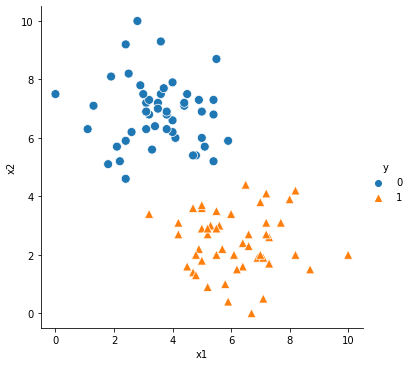

In [4]:
# TODO - Visualizar os dados em um gráfico de dispersão
sns.relplot(x='x1', y='x2', hue='y', style = "y", markers = ['o','^'], data = dados_empresa_A, height=5, s=80)
plt.show()

## 1 - Definição da Arquitetura

**Network 1 - Rede Neural com um Neurônio e Função de Ativação Sigmoidal**
* Input Layer: 2 nós, um para cada atributo.
* Output Layer: 1 neurônio com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$ (esta função retorna um valor entre 0 e 1).
----

<div align="center">
<img src="https://anfer86.github.io/teaching-datascience-lessons/aula07/img/neural_network_2.svg" width="40%">
</div>

> O treinamento de uma rede neural consiste em encontrar os valores dos pesos $w_1$, $w_2$ que resolvam o problema de classificação.


In [5]:
# Implementação da Rede Neural
class Network_1(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO - Definir as camadas da rede neural
        # Uma camada (fc1) com 2 atributos de entrada e um valor de saída        
        self.fc1 = nn.Linear(in_features=2, out_features=1)        
        
    def forward(self, x):
        # TODO - Definir ordem de passagem dos dados na camadas e função de ativação
        # Executar a combinação linear dos pesos
        x = self.fc1(x)
        # Executar função de ativação para garantir um valor entre 0 e 1
        x = torch.sigmoid(x)
        return x

In [6]:
model = Network_1()
model

Network_1(
  (fc1): Linear(in_features=2, out_features=1, bias=True)
)

## Interagindo com os Pesos da Rede Neural

In [7]:
X = dados_empresa_A[['x1','x2']]
y = dados_empresa_A['y']

class Model:
  def __init__(self, model):
    self.model = model
  def predict(self, X) :     
    outputs = self.model(torch.tensor(X, dtype=torch.float)).detach().numpy().round(0)    
    return np.array(outputs, dtype=int)
    
def plot_network_model(w1,w2,b):    
    model.state_dict()['fc1.weight'].copy_(torch.tensor([[w1,w2]]))
    model.state_dict()['fc1.bias'].copy_(torch.tensor([b]))    
    fig, ax = plt.subplots(figsize=(6, 6))    
    plot_decision_regions(X.to_numpy(), y = y.to_numpy(), ax = ax, clf=Model(model), legend=4, markers = ['o'], scatter_kwargs = {'s': 60})
    handles, labels = ax.get_legend_handles_labels()
    ax.set_title(r'$ f~(x_1, x_2, b) = x_1 * %0.2f + x_2 * %0.2f + %0.2f $'% (w1,w2,b), fontsize=14)
    ax.legend(handles, ['Selecionado','Não selecionado'], framealpha=0.3, scatterpoints=1, loc='lower right')
    ax.set_xlabel(r'$x_1$',fontsize=12)
    ax.set_ylabel(r'$x_2$',fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)    

w1 = widgets.FloatSlider(min=-2.0,max=2.0,step=0.05, description = 'w1', value = 0.0, continuous_update=False )
w2 = widgets.FloatSlider(min=-2.0,max=2.0,step=0.05, description = 'w2', value = -2.0, continuous_update=False)
b  = widgets.FloatSlider(min=0.0,max=2.0,step=0.05, description = 'b', value = 1.0, continuous_update=False)

ui = widgets.HBox([w1, w2, b])
out = widgets.interactive_output(plot_network_model, {'w1': w1, 'w2': w2, 'b': b})

display(ui,out)

Output()

## 2 - Treinamento

Quando temos um conjunto de dados em que possuímos a classe de cada instância é possível utilizar esses dados rotulados para realizar o treinamento seguindo os seguintes passos:
1. Passar os dados pela rede (um *batch*)
2. Calcular o erro da saída da rede com a classe das instâncias (loss)
3. Usar o erro para calcular quanto cada peso ($w_i$) contribuiu com esse erro (backward)
4. Atualizar os pesos

Vamos implementar uma função que realize o treinamento da nossa rede neural.

In [8]:
def train_epoch(model, loader, optimizer, criterion):        
    # TODO - Colocar a rede em modo de treinamento    
    model.train()
    losses = []
    for X_, y_ in loader: # em cada iteração temos um batch X_, y_ 
      y_ = y_.unsqueeze(1)     
      optimizer.zero_grad()
      # TODO - Treinamento da Rede Neural
      # (1) Passar os dados pela rede neural (forward)
      y_pred = model(X_)    
      # (2) Calcular o erro da saída da rede com a classe das instâncias (loss)    
      loss = criterion(y_pred, y_)
      # (3) Usar o erro para calcular quanto cada peso (wi) contribuiu com esse erro (backward)
      loss.backward()
      # (4) Ataulizar os pesos da rede neural
      optimizer.step()        
      # Armazenar o loss
      losses += [loss.item()]
    # TODO - Colocar a rede em modo de teste    
    model.eval()
    # TODO - Retornar a média das perdas como medida de qualidade
    return np.mean(losses)

In [9]:
# FUNÇÃO AUXILIAR PARA VISUALIZAR O TREINAMENTO DA REDE
def train_and_evaluate(model, X, y, num_epochs, plot = False, plot_each = 10):
    # Transformando os dados para o formato de entrada na rede neural
    X_ = torch.tensor(X.to_numpy(), dtype=torch.float)
    y_ = torch.tensor(y.to_numpy(), dtype=torch.float)    
    train_loader = data_utils.DataLoader(data_utils.TensorDataset(X_, y_), batch_size=16, shuffle=True)
    # Método usado para atualizar os pesos da rede
    optimizer = optim.Adadelta(model.parameters())
    # Definindo o critério para medir o erro  
    criterion = nn.BCELoss() 
    e_measures = []
    pbar = tqdm(range(1,num_epochs+1))
    for e in pbar:    
      losses =  train_epoch(model, train_loader, optimizer, criterion)      
      y_pred = np.round(model(X_).detach().numpy())
      measures = {'epoch': e, 'loss': losses.round(3), 'accuracy' : accuracy_score(y_pred, y) }   
      pbar.set_postfix(measures)      
      if plot and (e % plot_each == 0 or e == num_epochs ):        
        clear_output(wait=True)
        fig, ax = plt.subplots(figsize=(6, 6))   
        plot_decision_regions(X.to_numpy(), y.to_numpy(), ax=ax, clf=Model(model), legend=4, markers = ['o','^'], scatter_kwargs = {'s': 60})
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['0 - Selecionado','1 - Não selecionado'], framealpha=0.3, scatterpoints=1, loc=1)
        ax.set_xlabel(r'$x_1$',fontsize=12)
        ax.set_ylabel(r'$x_2$',fontsize=12)        
        ax.set_title(measures)
        plt.show()  

**Estado inicial da Rede Neural**

In [10]:
# TODO - Criar uma rede neural Network_1()
model = Network_1()
# TODO - Mostrar os pesos da camada fc1
model.state_dict()

OrderedDict([('fc1.weight', tensor([[0.0066, 0.5444]])),
             ('fc1.bias', tensor([0.4077]))])

**Visualização do Treinamento**

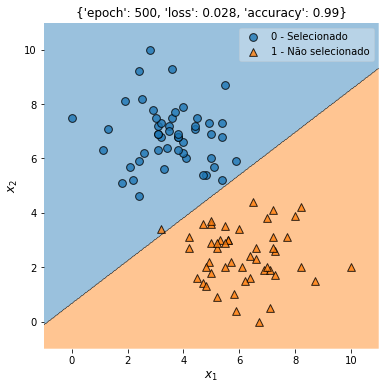

In [11]:
# TODO - Executar o treinamento da rede neural
train_and_evaluate(model, X, y, num_epochs = 500, plot=True, plot_each=5)

**Estado da Rede Neural pós treinamento**

In [12]:
# TODO - Mostrar os pesos e bias da camada fc1
model.state_dict()

OrderedDict([('fc1.weight', tensor([[ 1.6598, -2.1100]])),
             ('fc1.bias', tensor([1.4038]))])

## 3 - Avaliação

Vamos realizar a avaliação do modelo construído com dados que não participaram do processo de treinamento da rede neural.

In [22]:
# Função que mostra a região de classificação a partir do modelo e dos dados
def mostrar_região_de_classificacao (model, X, y, title, figsize=(6, 6) ):
  fig, ax = plt.subplots(figsize=figsize)   
  plot_decision_regions(X.to_numpy(), y.to_numpy(), ax=ax, clf=Model(model), legend=4, markers = ['o','^'], scatter_kwargs = {'s': 60})
  ax.set_title(title)
  ax.set_xlabel(r'$x_1$',fontsize=12)
  ax.set_ylabel(r'$x_2$',fontsize=12)
  ax.tick_params(axis='both', which='major', labelsize=12)
  plt.show()  

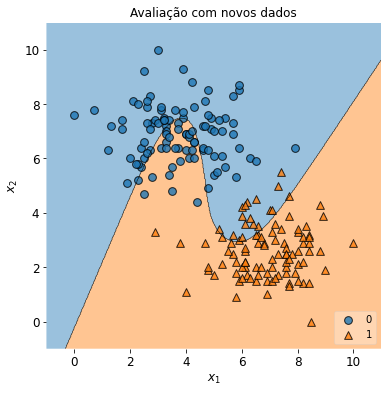

In [23]:
# TODO - Mudar o número de dados e verificar o resultado
dados_empresa_A_test = gerar_dados_empresa_A(n=200)

X_test = dados_empresa_A_test[['x1','x2']]
y_test = dados_empresa_A_test['y']

# TODO - Usar a função para mostrar a região de classificação
mostrar_região_de_classificacao(model, X_test, y_test, 'Avaliação com novos dados')

## Limitações da Rede Neural **Network_1**

Suponha que uma outra empresa (Empresa B) quer utilizar a mesma arquitetura de rede neural que a Empresa A construiu, *Network_1*, para treinar com os seus próprios dados, de forma a auxiliar no processo de tomada de decisão para a Empresa B.

In [15]:
def gerar_dados_empresa_B (n = 200, random_state = 7):    
  X, y = make_moons(n_samples=n, noise=0.1, random_state=random_state)
  X = MinMaxScaler().fit_transform(X) * 10  
  df = pd.DataFrame(dict(x1=X[:,0].round(1), x2=X[:,1].round(1), y=y))
  return df

In [16]:
# TODO - Gerar os dados da Empresa B e mostrar os alguns valores, os primeiros 10 por exemplo.
dados_empresa_B = gerar_dados_empresa_B()
dados_empresa_B.head(10)

,x1,x2,y
0,1.2,6.1,0
1,3.7,3.3,1
2,6.1,6.4,0
3,6.8,5.6,0
4,9.7,6.4,1
5,6.2,3.7,0
6,4.1,2.9,1
7,0.0,4.5,0
8,2.7,9.3,0
9,2.5,8.2,0


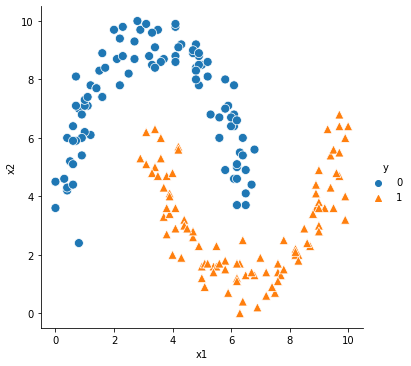

In [17]:
# TODO - Visualizar os dados em um gráfico de dispersão
sns.relplot(x='x1', y='x2', hue='y', style = "y", markers = ['o','^'], data = dados_empresa_B, height=5, s=80)
plt.show()

**Treinamento de Network_1 para a Empresa B**

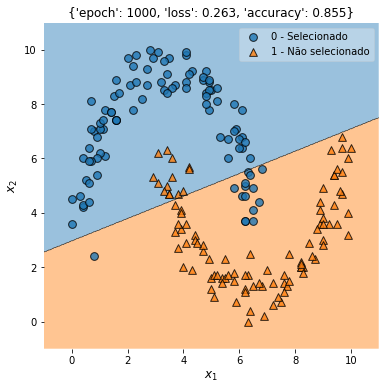

In [18]:
X = dados_empresa_B[['x1','x2']]
y = dados_empresa_B['y']

# TODO - Criar uma rede neural Network1()
model = Network_1()

# TODO - Executar o treinamento da rede neural
train_and_evaluate(model, X, y, num_epochs = 1000, plot=True, plot_each=50)

A principal limitação de Network_1 é que possui apenas um neurônio em sua estrutura e, portanto, tem a capacidade resolver problemas muito simples. 

E o problema de Empresa B requer de uma rede neural diferente, que permita criar regiões de classificação mais apropriadas.

# Construção de uma Rede Neural com Camada Escondida

## 1 - Definição da Arquitetura
**Network_2: Uma Rede Neural com Uma Camada Escondida**

Arquitetura da Rede Neural:
* Input Layer: Dois nós, um para cada atributo.
* Hidden Layer: 32 neurônios, com função de ativação sigmoidal $f_\sigma=\frac{1}{1 + e^{-x}}$
* Output Layer: 1 neurônio, com função de ativação sigmoidal $f_\sigma$
---

<div align="center">
<img src="https://anfer86.github.io/teaching-datascience-lessons/aula07/img/neural_network_4.svg" width="60%">
</div>

In [19]:
# Implementação da Rede Neural da Figura acima
class Network_2(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO - Definir as camadas da rede neural
        self.fc1 = nn.Linear(in_features=2, out_features=32)        
        self.fc2 = nn.Linear(in_features=32, out_features=1)        
                
    def forward(self, x):
        # TODO - Definir ordem de passagem dos dados nas camadas e funções de ativação
        x = torch.sigmoid( self.fc1(x) )
        x = torch.sigmoid( self.fc2(x) )        
        return x

## 2 - Treinamento

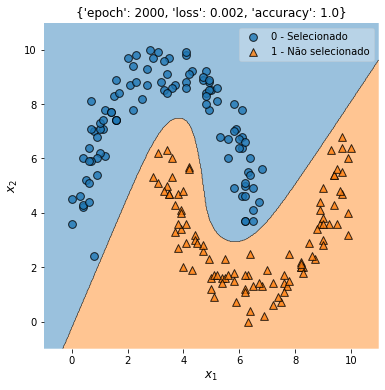

In [20]:
X = dados_empresa_B[['x1','x2']]
y = dados_empresa_B['y']

# TODO - Criar uma Rede Neural Network_2
model = Network_2()

# TODO - Executar o treinamento da rede neural
train_and_evaluate(model, X, y, num_epochs = 2000, plot=True, plot_each=100)

## 3 - Avaliação

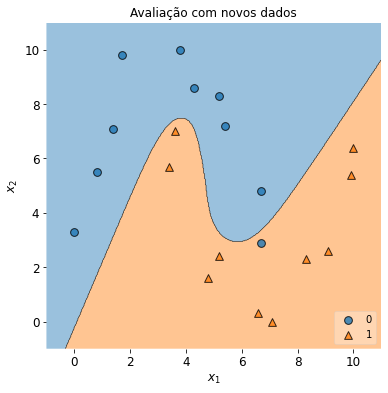

In [21]:
# TODO - Executar esta célula várias vezes para mostrar o resultado
dados_empresa_B_test = gerar_dados_empresa_B(n=20, random_state=None)
X_test = dados_empresa_B_test[['x1','x2']]
y_test = dados_empresa_B_test['y']

mostrar_região_de_classificacao(model, X_test, y_test, 'Avaliação com novos dados')

# Considerações

- Observamos que **conhecer os dados** é importante para a **definição da arquitetura** da rede neural. Felizmente várias arquiteturas podem resolver o mesmo problema, no caso de várias disponíveis, geralmente escolhe-se a mais simples.
- Nas visualizações apresentadas mostramos um **gráfico de dispersão de 2D** em que mostramos as **duas habilidades** $x_1$ e $x_2$ dos candidatos e a cor representa a classe.
- Em **problemas reais** geralmente temos **mais** do que dois **atributos**, e assim não é possível visualizar os dados tão facilmente.
- Existe muita pesquisa sobre como definir a arquitetura de uma rede neural a partir dos dados.


  

# Considerações sobre os Tipos de Dados

- Em problemas de classificação em que instância do problema é representada por atributos numéricos ou categóricos é comum o uso de redes neurais com camadas densas (*Linear*, *Dense* ou *Fully Connected*).
- Em outros problemas de classificação, por exemplo, quando instâncias são representadas por **imagens** cada píxel da imagem é um valor numérico de entrada para a rede neural.
> Considerando uma imagem de dimensões 32 x 32 pixels (considerada pequena), no formato RGB, teríamos $1024 \times 3 = 3074$ valores de entrada. Como uma rede neural consegue converter 3072 valores de entrada em apenas um valor entre 0 e 1 em um problema de classificação binária?